In [1057]:
import warnings
warnings.filterwarnings('ignore')

In [158]:
import os
import pyvolve
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import copy
import scipy
import networkx as nx
import seaborn as sns

In [552]:
import utils

## Comparisons of Models - WAG, LG, AB

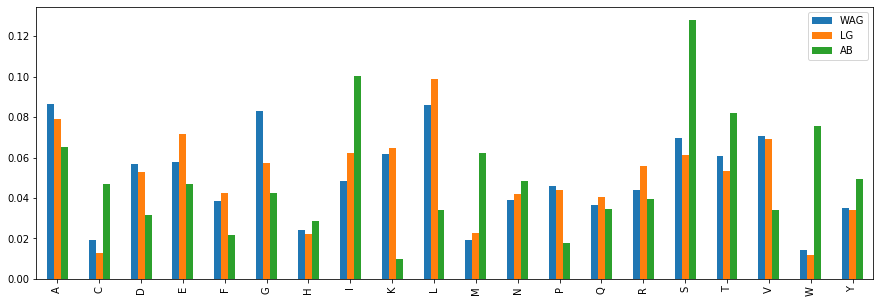

In [411]:
freq_df = pd.DataFrame()
for modelname in ['WAG', 'LG', 'AB']:
    model = pyvolve.Model(modelname)
    freq_df[modelname] = pd.Series(model.extract_state_freqs(), index = model.code)
freq_df.plot.bar(figsize = (15,5))

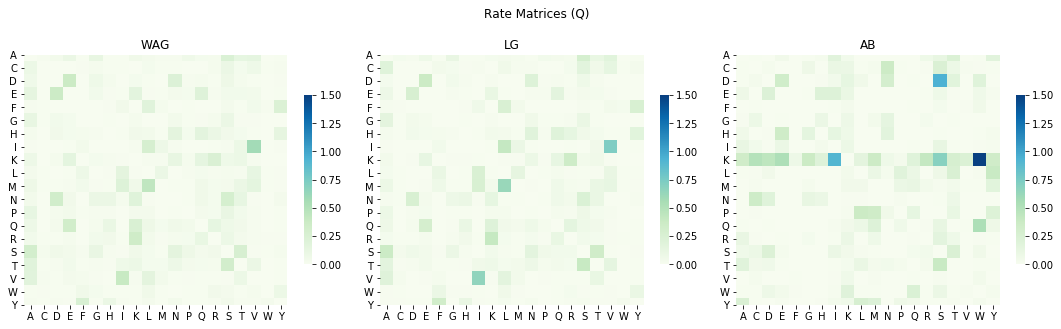

In [401]:
fig, axs = plt.subplots(1, 3, figsize =(15,5))
fig.suptitle('Rate Matrices (Q)')
for i, modelname in enumerate(['WAG', 'LG', 'AB']):
    model = pyvolve.Model(modelname)
    rate_matrix = copy.deepcopy(model.matrix)
    np.fill_diagonal(rate_matrix, 0)
    sns.heatmap(rate_matrix,cmap = 'GnBu', ax = axs[i], label  = modelname,
                xticklabels=model.code,vmax = 1.5, square=True, cbar_kws={"shrink": .5} )
    axs[i].set_yticklabels(model.code, rotation = 'horizontal')
    axs[i].set_title(modelname)
plt.tight_layout()

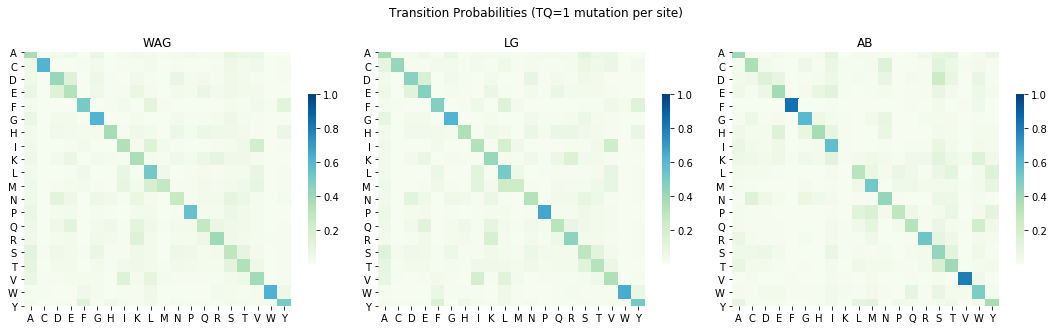

In [406]:
fig, axs = plt.subplots(1, 3, figsize =(15,5))
fig.suptitle('Transition Probabilities (TQ=1 mutation per site)')
for i, modelname in enumerate(['WAG', 'LG', 'AB']):
    model = pyvolve.Model(modelname)
    rate_matrix = copy.deepcopy(model.matrix)
    sns.heatmap(scipy.linalg.expm(rate_matrix),cmap = 'GnBu', ax = axs[i], label  = modelname,
                xticklabels=model.code,vmax = 1., square=True, cbar_kws={"shrink": .5} )
    axs[i].set_yticklabels(model.code, rotation = 'horizontal')
    axs[i].set_title(modelname)
plt.tight_layout()

## Delta Matrices for Amino acids

In [683]:
filename = '/Poppy/vbhardwaj/shm_project/aadelta_matrices.xlsx'

In [815]:
Delta = delta_matrices(volume = utils.get_delta_matrix(filename, 'volume'), 
                       polarity = utils.get_delta_matrix(filename, 'polarity'), 
                       aromaticity = utils.get_delta_matrix(filename, 'aromaticity'),
                       composition = utils.get_delta_matrix(filename, 'composition'))

In [816]:
Delta

Delta matrices of sizes  
Volume      - (20, 20)
Polarity    - (20, 20)
Aromaticity - (20, 20)
Composition - (20, 20)

Rows and columns for Volume
Rows    = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
Columns = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

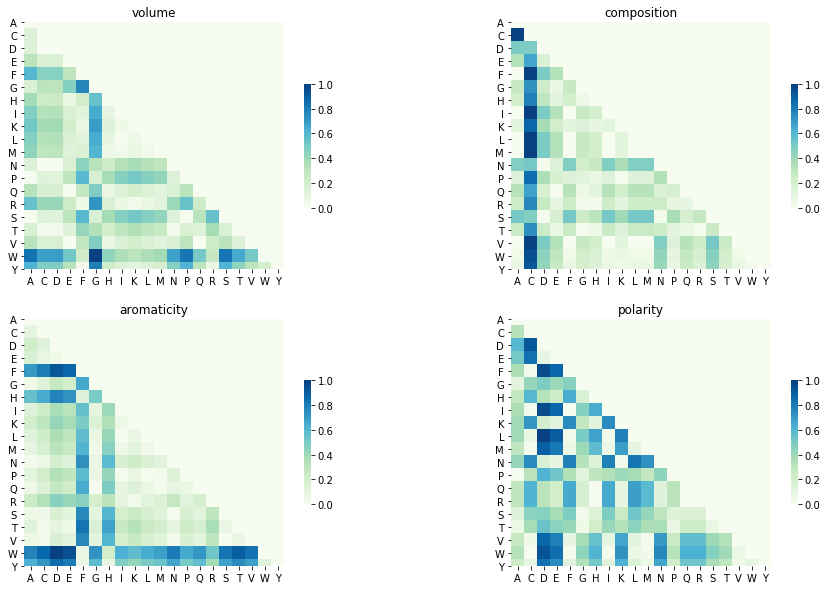

In [817]:
Delta.plot()

## For one clonal tree

In [1837]:
importlib.reload(utils)

<module 'utils' from '/Poppy/vbhardwaj/shm_project/utils.py'>

### Simulations

In [1838]:
CG_1615 = utils.clonal_graph(shm_file  = './Data/lineage1615_vertices30_shms.txt',
                             seqs_file = './Data/lineage1615_vertices30_seqs.txt')

In [1843]:
# Select model and root sequence. 
my_model = pyvolve.Model('WAG')
my_partition = pyvolve.Partition(models = my_model, root_sequence = "YYYYYYYYYYYYY")
my_evolver = pyvolve.Evolver(partitions = my_partition, tree = CG_1615.pyvolve_phylogeny)

In [1844]:
CG_1615.simulations = []
for i in range(100):
    my_evolver(write_anc = True,
               ratefile = None,
               infofile =  None,
               seqfile =None )
    simulated_seqs = my_evolver.get_sequences(anc = True)
    CG_1615.simulations.append(simulated_seqs)
   

### Null distributions

In [1845]:
null_dists = CG_1615.sims_to_null_dists(Delta)

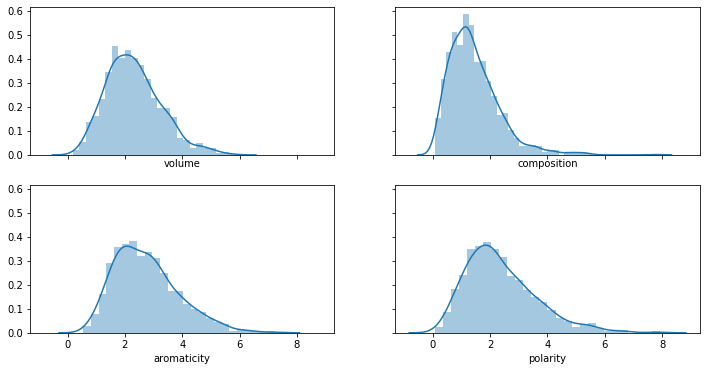

In [1842]:
#AB
fig, axs = plt.subplots(2, 2, figsize = (12,6), sharex=True, sharey=True)
axs = axs.ravel()
for i, a_property in enumerate(['volume', 'composition','aromaticity', 'polarity']):
    sns.distplot(null_dists.loc[a_property], ax = axs[i],)
    #axs[i].set_title(a_property)

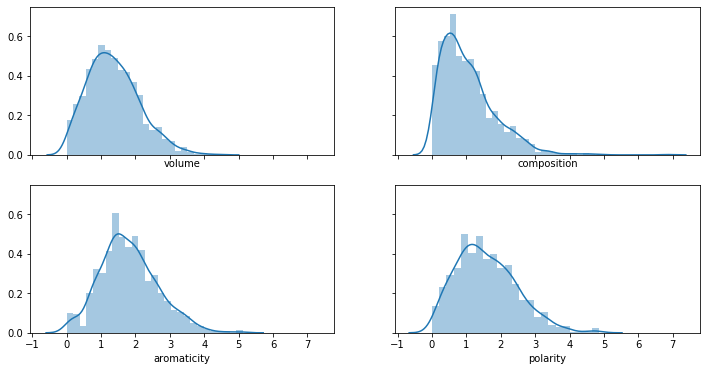

In [1846]:
#WAG
fig, axs = plt.subplots(2, 2, figsize = (12,6), sharex=True, sharey=True)
axs = axs.ravel()
for i, a_property in enumerate(['volume', 'composition','aromaticity', 'polarity']):
    sns.distplot(null_dists.loc[a_property], ax = axs[i],)
    #axs[i].set_title(a_property)

In [1847]:
simulated

{'Node25a': 'YYYYY',
 'Node28a': 'YYFYY',
 'Node19a': 'YPFYY',
 'Node23a': 'YPFYY',
 'Node22a': 'YPFYY',
 'Node27a': 'YPFYY',
 'Node24a': 'YMFYY',
 'Node20a': 'YYYYL',
 'Node21a': 'YYMYL',
 'Node26a': 'AYMYS',
 'Node29a': 'AYMAS',
 'Node8a': 'AYMCD',
 'Node11a': 'AYMCD',
 'Node4a': 'AYMCD',
 'Node18a': 'AYMCS',
 'Node10a': 'ALMCC',
 'Node12a': 'ALMCG',
 'Node13a': 'ALMCG',
 'Node6a': 'AMMCS',
 'Node17a': 'AYMCD',
 'Node9a': 'AAMCD',
 'Node5a': 'AAMCD',
 'Node3a': 'AAMID',
 'Node0a': 'TAMGD',
 'Node2a': 'DAMGD',
 'Node1a': 'TAMGD',
 'Node7a': 'AAMCD',
 'Node15a': 'AAMCD',
 'Node14a': 'AAMCD',
 'Node16a': 'AAMCD'}